In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import math
from scipy.stats import ttest_ind, f_oneway
from pandas.core.base import duplicated
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler , LabelEncoder , MinMaxScaler
from pandas.plotting import scatter_matrix
from sklearn.metrics import  f1_score
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


# from tensorflow import keras
# from tensorflow.keras import layers
from scipy.stats import chi2_contingency
from helpers import categorical_univariate , categorical_bivariate
# from preprocessing import encoding

In [2]:
data =pd.read_csv("archive/Employee.csv")
data.head()

Education  JoiningYear       City  PaymentTier  Age  Gender EverBenched  \
0  Bachelors         2017  Bangalore            3   34    Male          No   
1  Bachelors         2013       Pune            1   28  Female          No   
2  Bachelors         2014  New Delhi            3   38  Female          No   
3    Masters         2016  Bangalore            3   27    Male          No   
4    Masters         2017       Pune            3   24    Male         Yes   

   ExperienceInCurrentDomain  LeaveOrNot  
0                          0           0  
1                          3           1  
2                          2           0  
3                          5           1  
4                          2           1

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [4]:
data.describe()

JoiningYear  PaymentTier          Age  ExperienceInCurrentDomain  \
count  4653.000000  4653.000000  4653.000000                4653.000000   
mean   2015.062970     2.698259    29.393295                   2.905652   
std       1.863377     0.561435     4.826087                   1.558240   
min    2012.000000     1.000000    22.000000                   0.000000   
25%    2013.000000     3.000000    26.000000                   2.000000   
50%    2015.000000     3.000000    28.000000                   3.000000   
75%    2017.000000     3.000000    32.000000                   4.000000   
max    2018.000000     3.000000    41.000000                   7.000000   

        LeaveOrNot  
count  4653.000000  
mean      0.343864  
std       0.475047  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max       1.000000

In [5]:
# checking for nulls 
data.isna().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [6]:
# class balance check 
data['LeaveOrNot'].value_counts()

0    3053
1    1600
Name: LeaveOrNot, dtype: int64

In [7]:
# checking for duplicates 
duplicated  = data[data.duplicated()]
duplicated 

Education  JoiningYear       City  PaymentTier  Age  Gender EverBenched  \
111   Bachelors         2017       Pune            2   27  Female          No   
130   Bachelors         2017  Bangalore            3   26  Female          No   
138   Bachelors         2017  New Delhi            3   28    Male          No   
160   Bachelors         2014  Bangalore            3   28  Female          No   
167   Bachelors         2014  Bangalore            3   25    Male          No   
...         ...          ...        ...          ...  ...     ...         ...   
4640  Bachelors         2015  Bangalore            3   35    Male          No   
4642  Bachelors         2012  Bangalore            3   36  Female          No   
4646  Bachelors         2013  Bangalore            3   25  Female          No   
4648  Bachelors         2013  Bangalore            3   26  Female          No   
4652  Bachelors         2015  Bangalore            3   33    Male         Yes   

      ExperienceInCurrentDomain  LeaveOrNot  
111                           5           1  
130                           4           0  
138                           2           0  
160                           3           0  
167                           3           0  
...                         ...         ...  
4640                          0           0  
4642                          4           0  
4646                          3           0  
4648                          4           0  
4652                          4           0  

[1889 rows x 9 columns]

In [8]:
len (duplicated)

1889

In [9]:
# we must remove those duplicated rows 
data.drop_duplicates(keep=False, inplace=True)

# 1-EDA

# 1.1 Categroical Variables 

In [10]:
def values_count (df) :
    categorical_columns = df.select_dtypes(include=['object']).columns

    for col in categorical_columns:
        print(f"Value counts for {col}:")
        print(df[col].value_counts())
        print("="*30)

In [11]:
values_count(data)

Value counts for Education:
Bachelors    1413
Masters       502
PHD           137
Name: Education, dtype: int64
Value counts for City:
Bangalore    836
New Delhi    616
Pune         600
Name: City, dtype: int64
Value counts for Gender:
Male      1091
Female     961
Name: Gender, dtype: int64
Value counts for EverBenched:
No     1758
Yes     294
Name: EverBenched, dtype: int64


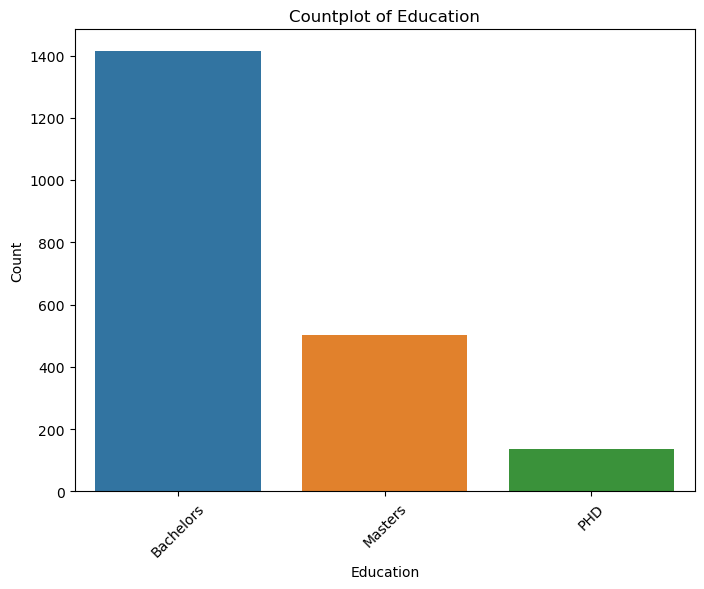

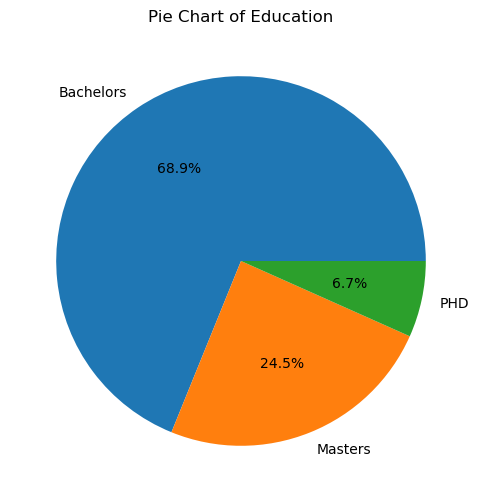

In [12]:
categorical_univariate(data,"Education")

In [13]:
data ["JoiningYear"].value_counts ()

2017    494
2015    333
2013    297
2014    275
2016    235
2012    235
2018    183
Name: JoiningYear, dtype: int64

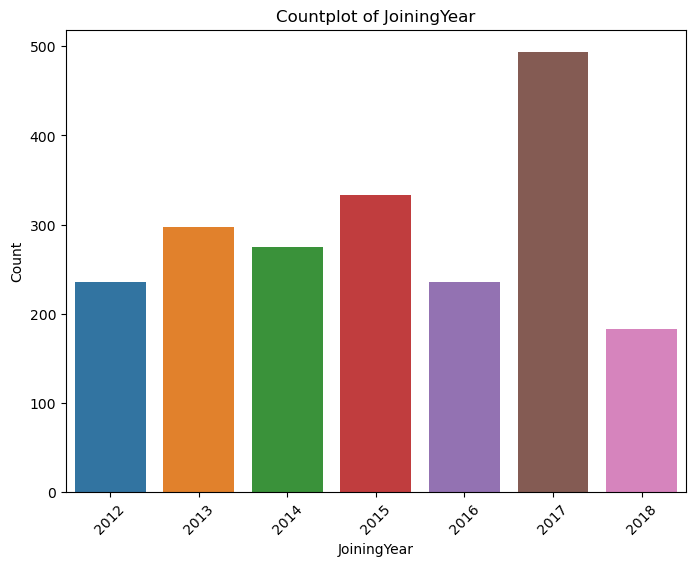

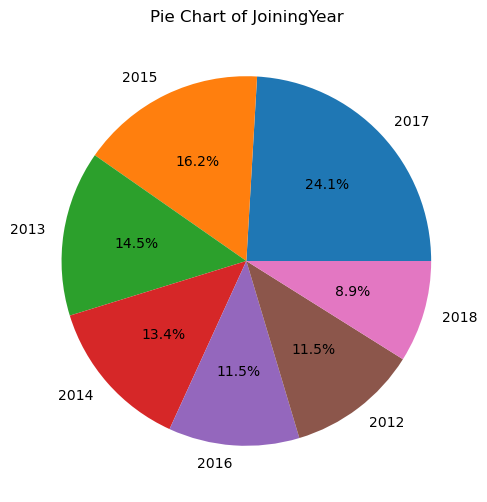

In [14]:
categorical_univariate(data ,"JoiningYear")

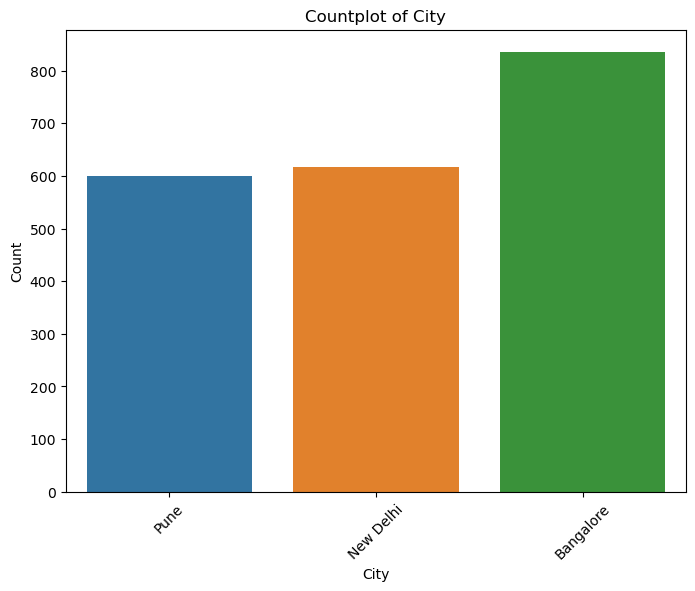

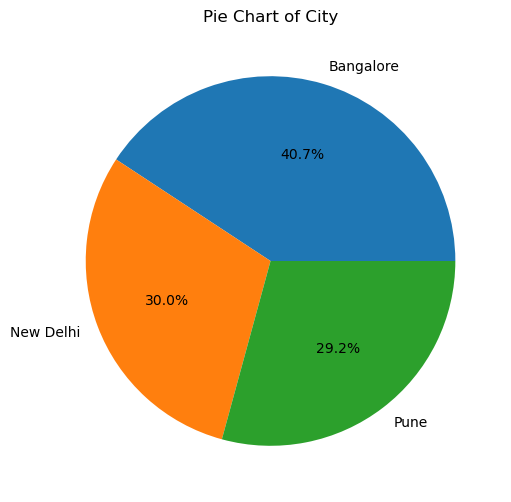

In [15]:
categorical_univariate(data,"City")

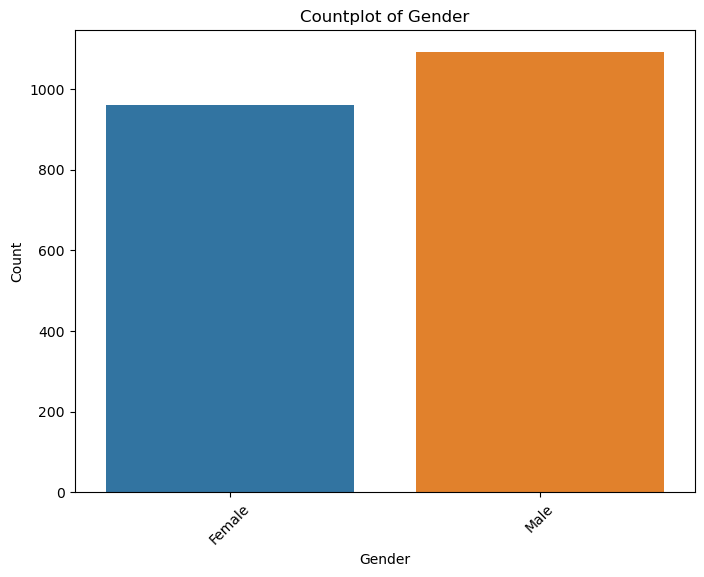

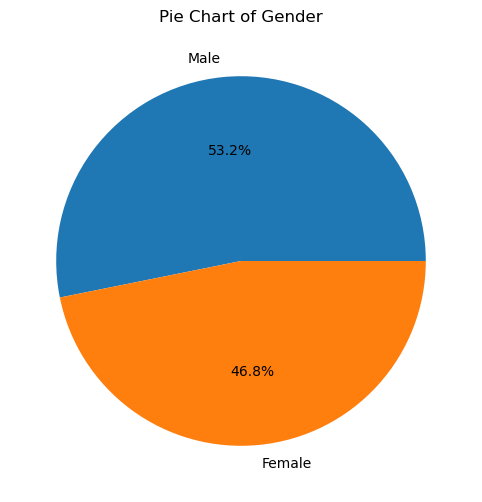

In [16]:
categorical_univariate(data , "Gender")

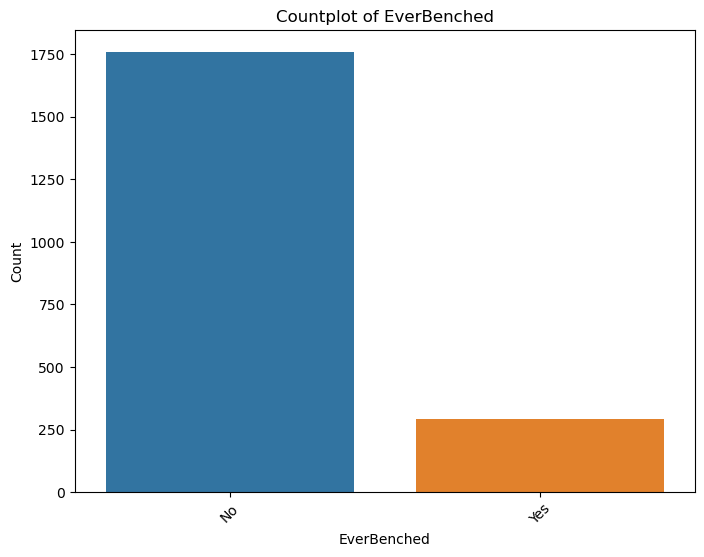

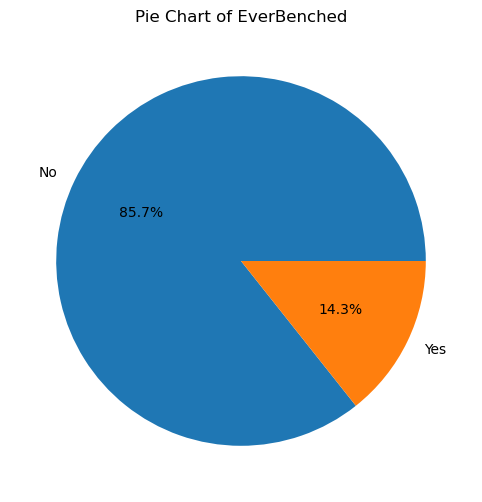

In [17]:
categorical_univariate(data , "EverBenched")

# let us have the next step to have a test statistic for categorical columns  and the target varaiable and skip bi variate analysis for cat. columns , as it is only EDA not Explanatory analysis step

In [18]:
# now creating function to Apply test statistic for all categorical colunms

def test_statistic (column_name) :
  """
    Perform a Chi-squared test for independence between two categorical variables.

    Args:
        column_name (str): a categorical variable.


    Returns:
        chi2_stat (float): Chi-squared test statistic.
        p_val (float): P-value of the test.
        dof (int): Degrees of freedom.
        expected (ndarray): Expected frequencies under the null hypothesis.
    """
  # Create Contingency Table
  contingency_table = pd.crosstab(data[column_name], data['LeaveOrNot'])
  print("our table ",contingency_table)

  # Perform Chi-squared Test
  chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
  print(f"Chi-squared Statistic: {chi2_stat}")
  print(f"P-value: {p_val}")
  print(f"Degrees of Freedom: {dof}")
  print("Expected Frequencies:")
  print(expected)







Set up Hypotheses:

    Null Hypothesis (H0): There is no association between the two categorical variables.
    Alternative Hypothesis (H1): There is an association between the two categorical variables.

In [19]:
test_statistic ("Education")


our table  LeaveOrNot    0    1
Education           
Bachelors   846  567
Masters     264  238
PHD         101   36
Chi-squared Statistic: 21.250713188061603
P-value: 2.429216727281361e-05
Degrees of Freedom: 2
Expected Frequencies:
[[833.89035088 579.10964912]
 [296.2582846  205.7417154 ]
 [ 80.85136452  56.14863548]]


In [20]:
test_statistic ("City")


our table  LeaveOrNot    0    1
City                
Bangalore   511  325
New Delhi   402  214
Pune        298  302
Chi-squared Statistic: 33.14839882471378
P-value: 6.337480751002162e-08
Degrees of Freedom: 2
Expected Frequencies:
[[493.37037037 342.62962963]
 [363.53606238 252.46393762]
 [354.09356725 245.90643275]]


In [21]:
test_statistic ("Gender")


our table  LeaveOrNot    0    1
Gender              
Female      477  484
Male        734  357
Chi-squared Statistic: 65.01988030349929
P-value: 7.414624677858e-16
Degrees of Freedom: 1
Expected Frequencies:
[[567.13986355 393.86013645]
 [643.86013645 447.13986355]]


In [22]:
test_statistic ("EverBenched")


our table  LeaveOrNot      0    1
EverBenched           
No           1046  712
Yes           165  129
Chi-squared Statistic: 1.052059747951759
P-value: 0.30503318492204295
Degrees of Freedom: 1
Expected Frequencies:
[[1037.49415205  720.50584795]
 [ 173.50584795  120.49415205]]


# Conclusion 
from all the tests above , it seems that all categorical variables are signifcant to the target , except EverBenched column , because pvalue 0.3 which is bigger than signficance level (alpha) whcih equals 0.05

# 1.1 Numeric Variables 

In [23]:
num_cols = data.select_dtypes(include='number').columns 
num_cols 


Index(['JoiningYear', 'PaymentTier', 'Age', 'ExperienceInCurrentDomain',
       'LeaveOrNot'],
      dtype='object')

In [24]:
num_cols = num_cols.to_list()

In [25]:
num_cols .remove ("LeaveOrNot")
num_cols

['JoiningYear', 'PaymentTier', 'Age', 'ExperienceInCurrentDomain']

JoiningYear


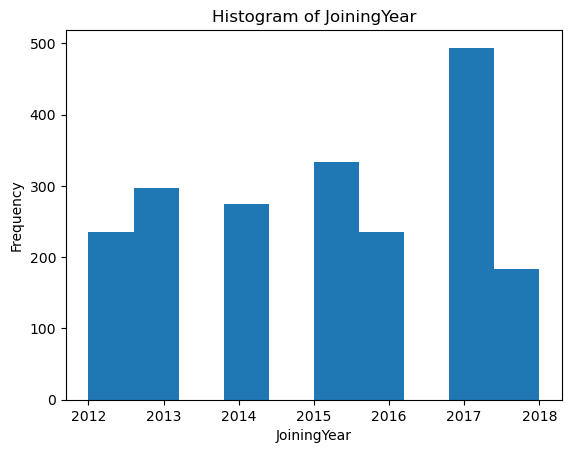

PaymentTier


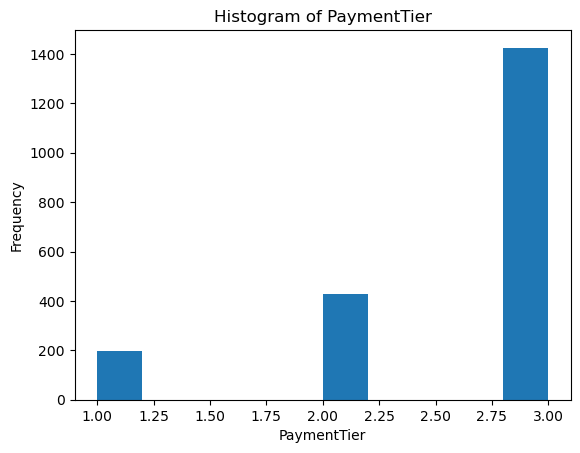

Age


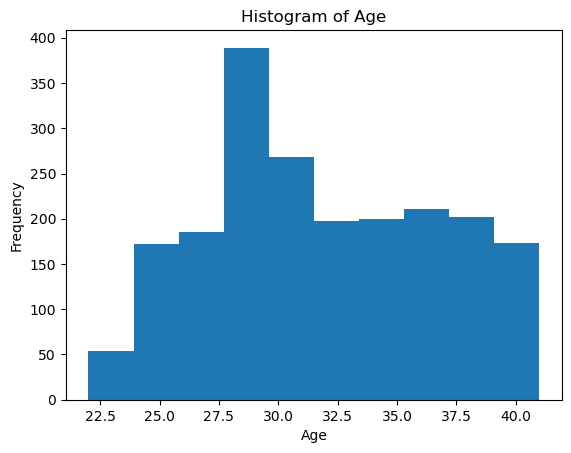

ExperienceInCurrentDomain


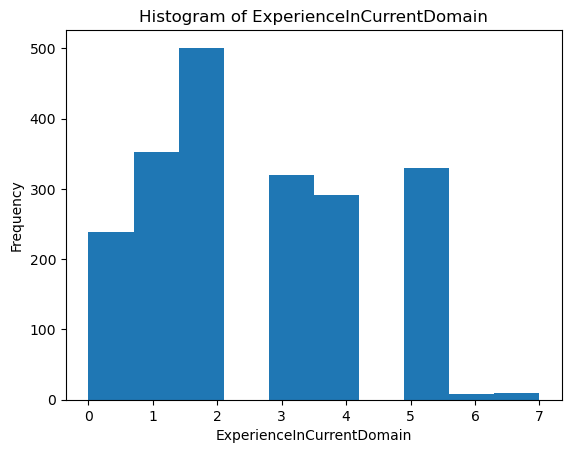

In [26]:
# Univariate analysis - Histograms distributions
for column in num_cols:
    plt.figure()
    print (column)
    data[column].plot(kind='hist', bins=10)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.show()

In [27]:
data['PaymentTier'].value_counts()

3    1425
2     428
1     199
Name: PaymentTier, dtype: int64

here PaymentTier is a categorical column 

In [28]:
data['ExperienceInCurrentDomain'].value_counts()

2    501
1    353
5    330
3    320
4    292
0    239
7      9
6      8
Name: ExperienceInCurrentDomain, dtype: int64

And Here ExperienceInCurrentDomain is a discrete numeric variable , which is not needed to be normally distributed ,only need to be scaled 


# check thier importance to our target 


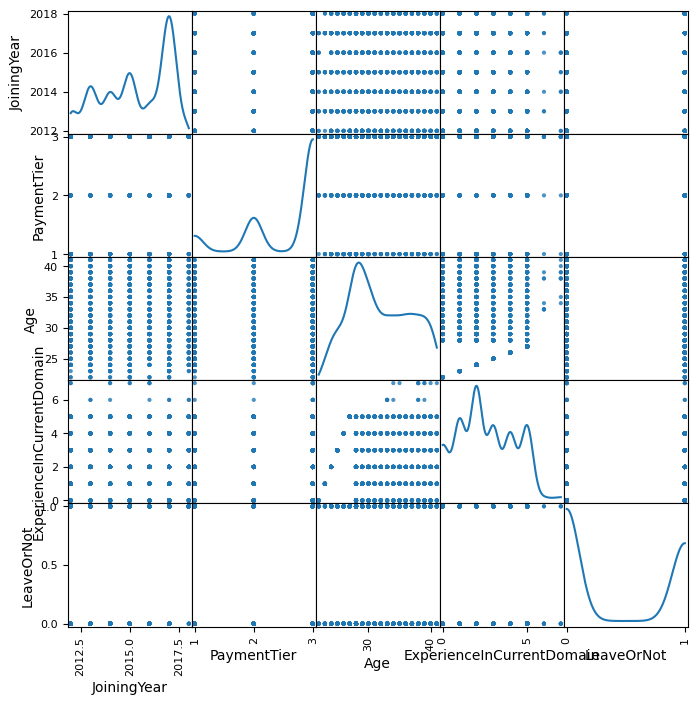

In [29]:
# check for multicollinearity

# Create a scatter matrix
scatter_matrix(data , alpha=0.8, figsize=(8, 8), diagonal='kde')
plt.show()

# after ploting scatter matrix there is no multicollinearity between feature variables 

In [30]:

def plot_skewness_all_features(df):
    """
    Plot the distribution and skewness of all features in a DataFrame.

    Args:
        df (pandas.DataFrame): Input DataFrame.

    Returns:
        None
    """
    num_features = df.select_dtypes(include=['float64', 'int64'])  # Select numerical features

    num_cols = num_features.columns
    num_cols_count = len(num_cols)
    num_rows = math.ceil(num_cols_count / 2)

    # Create subplots
    fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(12, 8))
    fig.tight_layout(pad=3.0)

    for i, col in enumerate(num_cols):
        ax = axes[i // 2, i % 2] if num_cols_count > 1 else axes[i % 2]

        # Create a distribution plot
        sns.distplot(df[col], ax=ax, label=f"Skewness: {df[col].skew():.2f}")

        # Add labels and legend
        ax.set_xlabel(col)
        ax.set_ylabel('Frequency')
        ax.legend()

    # Show the plot
    plt.show()


C:\Users\Sohayb\AppData\Local\Temp\ipykernel_3700\3968794816.py:25: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], ax=ax, label=f"Skewness: {df[col].skew():.2f}")
C:\Users\Sohayb\AppData\Local\Temp\ipykernel_3700\3968794816.py:25: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], ax

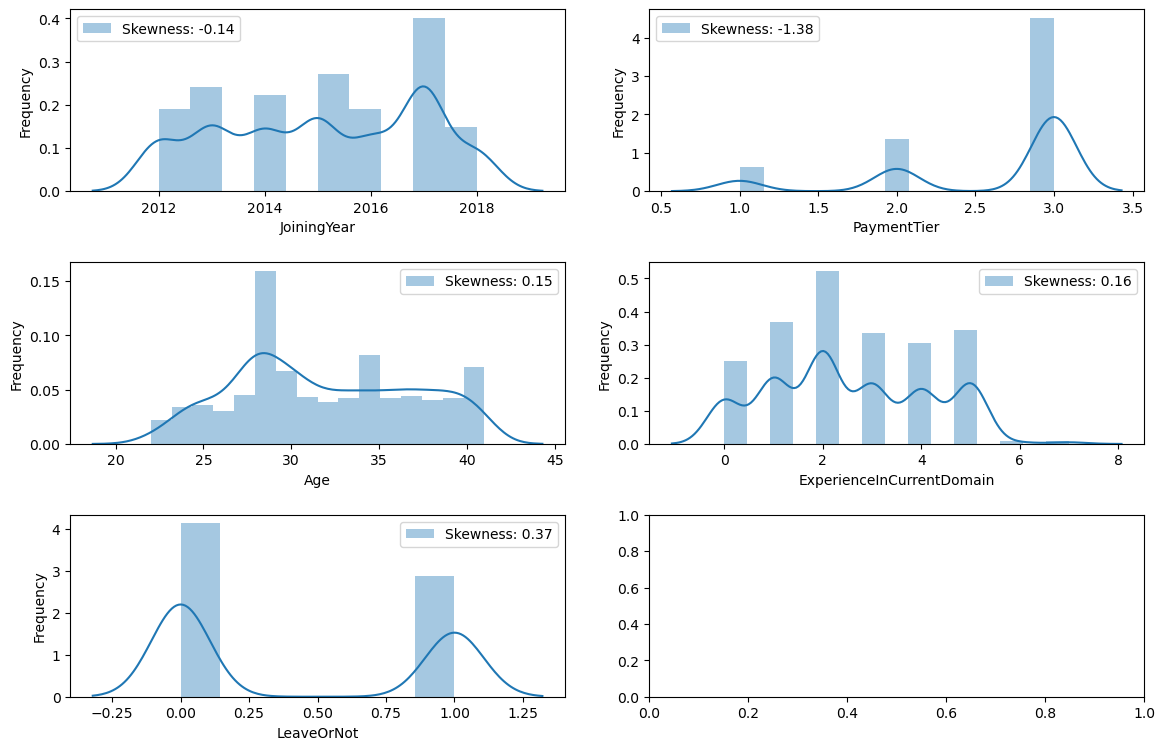

In [31]:
plot_skewness_all_features(data)

# here age has some skweness need to be handled 

# Now Testing Dependcies with target variable 

In [32]:
data .info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2052 entries, 1 to 4651
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  2052 non-null   object
 1   JoiningYear                2052 non-null   int64 
 2   City                       2052 non-null   object
 3   PaymentTier                2052 non-null   int64 
 4   Age                        2052 non-null   int64 
 5   Gender                     2052 non-null   object
 6   EverBenched                2052 non-null   object
 7   ExperienceInCurrentDomain  2052 non-null   int64 
 8   LeaveOrNot                 2052 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 160.3+ KB


In [33]:

def test_numeric_features(df, numeric_columns, target_column):
    """
    Perform t-tests for each numeric feature with respect to binary target variable.

    Args:
        df (pandas.DataFrame): Input DataFrame.
        numeric_columns (list): List of numeric column names to test.
        target_column (str): Name of the binary categorical target variable (0 or 1).

    Returns:
        dict: A dictionary containing feature names as keys and corresponding p-values as values.
    """
    results = {}

    for column in numeric_columns:
        category_0 = df[column][df[target_column] == 0]
        category_1 = df[column][df[target_column] == 1]

        # Perform t-test
        statistic, p_value = ttest_ind(category_0, category_1)

        results[column] = p_value

    return results



#Feature selection for  numeric variables and see if they affect the target or not

To test the significance of a numeric feature with a categorical target variable, you can use a hypothesis test or a statistical test appropriate for this scenario. One common test for this purpose is the Analysis of Variance (ANOVA) test.

Here are the steps to perform the test:

    Set Up Hypotheses:
        Null Hypothesis (H0): The means of the numeric feature are equal across all categories of the categorical target.
        Alternative Hypothesis (H1): At least one category has a different mean.

    Perform ANOVA Test:
        Use an appropriate function from a library like scipy.stats in Python to perform the ANOVA test. The specific function depends on the programming language you're using.

In [34]:
results = test_numeric_features(data, numeric_columns=num_cols, target_column='LeaveOrNot')
print(results)

{'JoiningYear': 6.262754088955719e-10, 'PaymentTier': 3.724506464398313e-05, 'Age': 4.213980891168741e-08, 'ExperienceInCurrentDomain': 0.03894991020428941}


# now from all feature selection process on numeric and categorical are positive except EverBenched and i will drop it 

# Preprocessing 

# 1 Scaling for numerics 

In [35]:
num_cols

['JoiningYear', 'PaymentTier', 'Age', 'ExperienceInCurrentDomain']

In [36]:
num_cols.remove ("PaymentTier")

In [37]:
#now lets scale our data
# Create a StandardScaler object
scaler = StandardScaler()

# Apply the scaler to the numeric features
data[num_cols] = scaler.fit_transform(data[num_cols])

# 2 Encoding for categorical 

In [38]:
data['PaymentTier'] = pd.Categorical(data['PaymentTier'])
data.drop ("EverBenched",axis =1 , inplace =True)

In [39]:
data = pd.get_dummies(data , drop_first=True )

In [40]:
data.head()

JoiningYear       Age  ExperienceInCurrentDomain  LeaveOrNot  \
1    -1.102734 -0.761190                   0.271802           1   
2    -0.576744  1.217480                  -0.339752           0   
3     0.475237 -0.959057                   1.494908           1   
4     1.001227 -1.552659                  -0.339752           1   
6    -0.050753  1.217480                  -1.562859           0   

   Education_Masters  Education_PHD  City_New Delhi  City_Pune  PaymentTier_2  \
1                  0              0               0          1              0   
2                  0              0               1          0              0   
3                  1              0               0          0              0   
4                  1              0               0          1              0   
6                  0              0               1          0              0   

   PaymentTier_3  Gender_Male  
1              0            0  
2              1            0  
3              1            1  
4              1            1  
6              1            1

# 3 data splitting 

In [41]:
X = data.drop ('LeaveOrNot',axis =1 )
y = data['LeaveOrNot']

In [42]:
X_train,X_test , y_train , y_test = train_test_split(X,y , test_size = 0.2,random_state=44 ) 

# Model Training using gridsearchcv 

In [43]:

# Define the hyperparameters and values you want to try
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Create a logistic regression model
logistic_reg = LogisticRegression()

# Create a GridSearchCV object
grid_search = GridSearchCV(logistic_reg, param_grid, cv=5)

# Fit the GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_C = grid_search.best_params_['C']

# Use the best model to make predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate accuracy
accuracy = f1_score(y_test, y_pred)

# Print the best hyperparameters and accuracy
print(f'Best C: {best_C}')
print(f'Accuracy: {accuracy}')

Best C: 10
Accuracy: 0.5138888888888888


# MOdel Evaluation 

In [44]:
y_pred_train = best_model.predict(X_train)

accuracy = f1_score(y_train, y_pred_train)
print (accuracy)

0.525764192139738


In [45]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

clf.fit (X_train,y_train)

LogisticRegression()

In [46]:
pred_train = clf.predict(X_train)
pred_test = clf.predict (X_test)

In [47]:
from sklearn.metrics import classification_report

print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       0.68      0.82      0.75       969
           1       0.64      0.45      0.53       672

    accuracy                           0.67      1641
   macro avg       0.66      0.64      0.64      1641
weighted avg       0.66      0.67      0.66      1641



In [48]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.68      0.82      0.74       242
           1       0.63      0.44      0.52       169

    accuracy                           0.66       411
   macro avg       0.65      0.63      0.63       411
weighted avg       0.66      0.66      0.65       411



In [49]:
# Define the hyperparameters and values you want to try
param_grid = {'C': [0.1, 1, 10,100],
              'gamma': [0.01, 0.1, 1],
              'kernel': ['rbf']}  # We're using RBF kernel for non-linearity

# Create a Support Vector Classifier (SVC) object
svm_classifier = SVC()

# Create a GridSearchCV object
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5)

# Fit the GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Use the best model to make predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate accuracy
accuracy = f1_score(y_test, y_pred)

# Print the best hyperparameters and accuracy
print(f'Best Hyperparameters: {best_params}')
print(f'Accuracy: {accuracy}')

Best Hyperparameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Accuracy: 0.6875


In [50]:


# # Create a Support Vector Classifier (SVC) object
# svm_classifier = SVC(kernel='rbf', gamma='scale')  # You can use different kernels like 'rbf' or 'poly' for non-linear data

# # Fit the SVM classifier to the data
# svm_classifier.fit(X_train, y_train)

pred_train = grid_search.predict(X_train)
pred_test = grid_search.predict (X_test)


print ("#############Training##############")
print(classification_report(y_train, pred_train))

print ("###############Testing ####################")

print(classification_report(y_test, pred_test))

#############Training##############
              precision    recall  f1-score   support

           0       0.79      0.94      0.86       969
           1       0.88      0.64      0.74       672

    accuracy                           0.82      1641
   macro avg       0.84      0.79      0.80      1641
weighted avg       0.83      0.82      0.81      1641

###############Testing ####################
              precision    recall  f1-score   support

           0       0.76      0.92      0.83       242
           1       0.83      0.59      0.69       169

    accuracy                           0.78       411
   macro avg       0.80      0.75      0.76       411
weighted avg       0.79      0.78      0.77       411

